# Introduction

This assigment is divided into 4 parts.
-   load data
-   perform EDA
-   construct at least 2 linear models
-   use cross validate to choose a best model


In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

## 1. Load data

In this part I'll use load data from `M2_data.csv` as `pandas.DataFrame`.
I reviewed the UCI webset and summaried meanings of each attributes
The following are 4 explanatory variables
-   T: temperature in the range 1.81 $\circ$ and 37.11 $\circ$
-   AP: Ambient Pressure in the range 922.89-1033.30 milibar
-   RH: Relative Humidity in the range 25.56% to 100.16%
-   V: exhaust vaccum in teh range 25.36-81.56 cm Hg

The following is the response variable
-   EP: net hourly electrical energy output in the range 420.26-495.76 MW

## 2 EDA
In this part I'll perfrom some statistic analysis on the dataset such as distribution anaylsis.



In [18]:
data = pd.read_csv('M2_data.csv')

Bar plots for distribution visualization. 
I'll plot the data in 20 bars and denotes it's mean value and the range $[\mu - \sigma, \mu + \sigma]$.
 

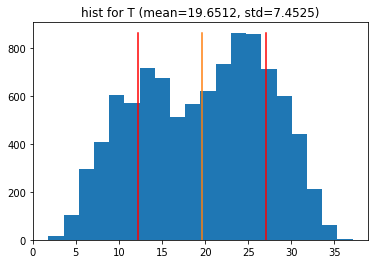

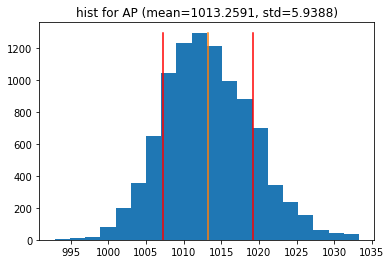

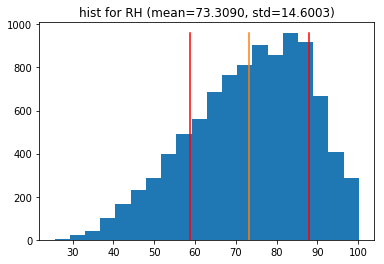

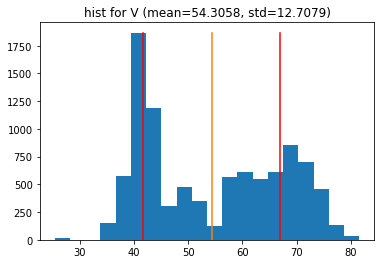

In [19]:
features = ['T', 'AP', 'RH', 'V']

for f in features:
    height, bins = np.histogram(data[f], bins=20)

    plt.hist(data[f], bins=20)
    plt.plot([data[f].mean(), data[f].mean()], [0, height.max()])
    plt.plot([data[f].mean() - data[f].std(), data[f].mean() - data[f].std()], [0, height.max()], c='r')
    plt.plot([data[f].mean() + data[f].std(), data[f].mean() + data[f].std()], [0, height.max()], c='r')
    plt.title('hist for {} (mean={:.4f}, std={:.4f})'.format(f, data[f].mean(), data[f].std()))
    plt.show()

## Conclusion

From these bar plots I found that `AP` seems to obey a normal distribution with $\mu = 1013.2591$ and $\sigma = 5.9388$. `T` has 2 peeks so it can't obey a normal distribution, it may obey a bimodal distribution. And `V` also has 2 peeks so it may obey a bimodal distribution too. But it's two peeks are not in same height. It is obviously that `RH` is skewed.


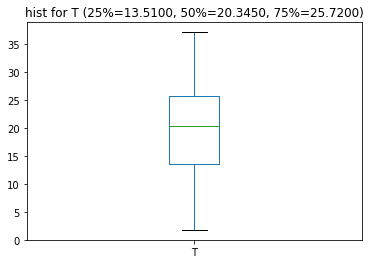

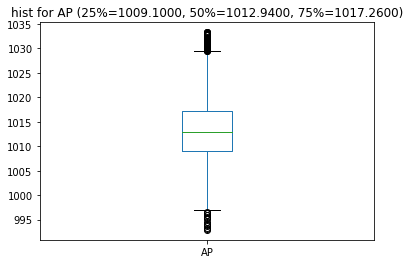

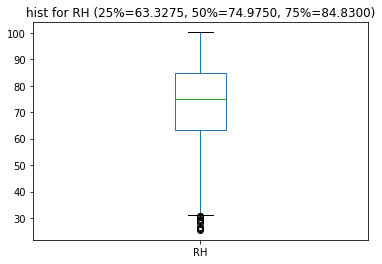

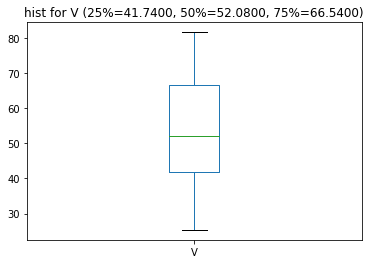

In [20]:
for f in features:

    data[f].plot(kind='box')
    plt.title('hist for {} (25%={:.4f}, 50%={:.4f}, 75%={:.4f})'.format(f, data[f].quantile(q=0.25), data[f].quantile(q=0.5), data[f].quantile(q=0.75)))
    plt.show()

## Conclusion

Here are box plots. We can see that there are some outliers in `V` and `RH`. 

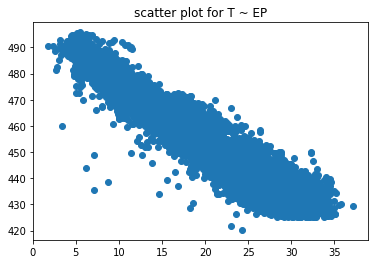

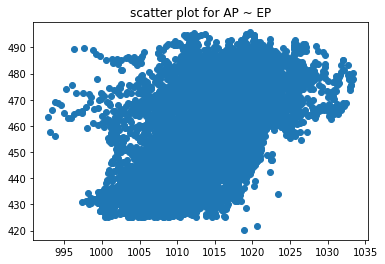

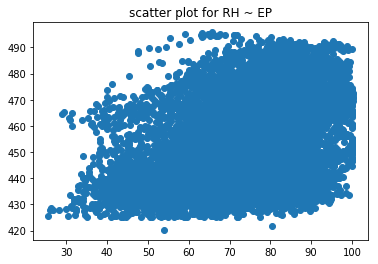

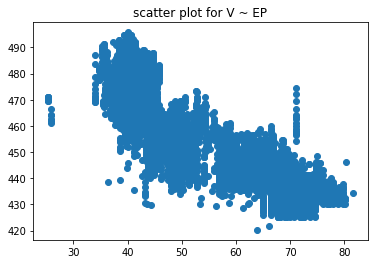

In [21]:
for f in features:

    plt.scatter(data[f], data['EP'])
    plt.title('scatter plot for {} ~ EP'.format(f))
    plt.show()

## Conclusion

From these scatter plot I found that `T` has a strong negative relationship with `EP` and `V` also has a negative relationship with `EP`. `AP` seems to have a positive relationship with `EP` but not too strong. I can't see any relationship between `RH` and `EP`. So `T` and `V` may be good features to prediting `EP`.

## 3 Construct Linear Model

I'll construct 4 linear models in this part. They'll use different variables
-   `T` and `V`, they are two features having a strong relationship with `EP`
-   `AP` and `RH`, they are two features having weakest relationship with `EP`
-   `T` and `RH`. `T` has strongest relationship with `EP` while `RH` has the weakest one.
-   all predicting features.

In [33]:
model1 = LinearRegression()
X = data[['T', 'V']].values
y = data['EP']
scores = cross_val_score(model1, X, y, cv=5)
print('Linear regressor on {} and {}'.format('T', 'V'))
print(scores)
print('Average score: {:.5f}'.format(scores.mean()))
print()


model2 = LinearRegression()
X = data[['AP', 'RH']].values
y = data['EP']
scores = cross_val_score(model2, X, y, cv=5)
print('Linear regressor on {} and {}'.format('AP', 'RH'))
print(scores)
print('Average score: {:.5f}'.format(scores.mean()))
print()

model3 = LinearRegression()
X = data[['T', 'RH']].values
y = data['EP']
scores = cross_val_score(model3, X, y, cv=5)
print('Linear regressor on {} and {}'.format('T', 'RH'))
print(scores)
print('Average score: {:.5f}'.format(scores.mean()))
print()


model4 = LinearRegression()
X = data[['T', 'AP', 'RH', 'V']]
y = data['EP']
scores = cross_val_score(model4, X, y, cv=5)
print('Linear regressor on all features')
print(scores)
print('Average score: {:.5f}'.format(scores.mean()))
print()



Linear regressor on T and V
[0.91639124 0.91209361 0.92058171 0.91573174 0.91332637]
Average score: 0.91562

Linear regressor on AP and RH
[0.36298409 0.40046462 0.37446294 0.38831735 0.39048763]
Average score: 0.38334

Linear regressor on T and RH
[0.92363973 0.91990374 0.92703639 0.91829337 0.91516422]
Average score: 0.92081

Linear regressor on all features
[0.93053597 0.92681472 0.93389127 0.92680208 0.92464499]
Average score: 0.92854



## Conclusion

I used 5-fold cross validation and found that model trained on all features is better then others. Besides this, model trained on `T` and `RH` is the second best model. I was surprised because `T` has the strongest relationship with `EP` but `RH` has the weekest relationship with `EP`, but combination of them is better then `T` and `V`. I think the bad performance of `RH` may help the model avoid overfitting. So strong-related features may not be best combination sometimes.